In [1]:
import numpy
import py_entropy
from matplotlib import pyplot

## Pure initial state, particle on a boundary

$$ \rho = \vert 0 \rangle \langle 0 \vert $$

In [11]:
ne = 1000
n_layers = 10000
all_purities = []

ns = 10*numpy.arange(1,11)
for n in ns:
    state = numpy.array([1] + [0]*(n-1), dtype=numpy.complex128)
    part_on_bound = py_entropy.SingleDefectState(state, num_experiments=ne)
    purities = part_on_bound.apply_alternative_layers_and_save_mean_purity(n_layers)
    all_purities.append(purities)
pure_purities = numpy.array(all_purities)

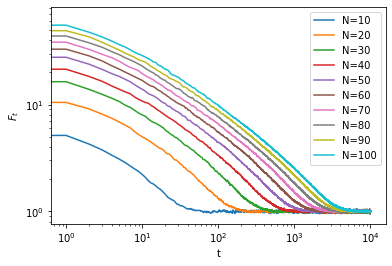

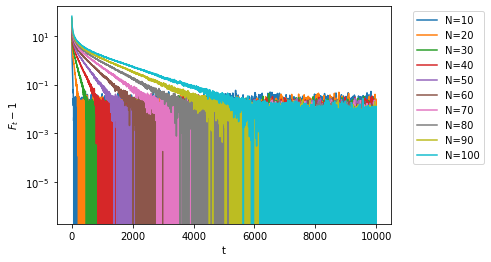

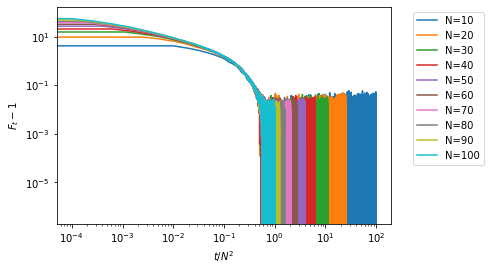

In [15]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(n*purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(n*purity - 1, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.legend(bbox_to_anchor=(1.05,1.0))
pyplot.show()

for n, purity in zip(ns, pure_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l) / (n**2), n*purity - 1, label=f"N={n}")
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend(bbox_to_anchor=(1.05,1.0))
pyplot.show()

## Pure initial state, uniformly delocalized

$$ \rho = \frac{1}{N} \left(\sum_i \vert i \rangle \right) \left( \sum_i \langle i \vert \right) $$

In [10]:
ne = 1000
n_layers = 10000
all_purities = []

ns = 10*numpy.arange(1,11)
for n in ns:
    state = numpy.array([1]*n, dtype=numpy.complex128) / numpy.sqrt(n)
    part_on_bound = py_entropy.SingleDefectState(state, num_experiments=ne)
    purities = part_on_bound.apply_alternative_layers_and_save_mean_purity(n_layers)
    all_purities.append(purities)
pure_purities = numpy.array(all_purities)

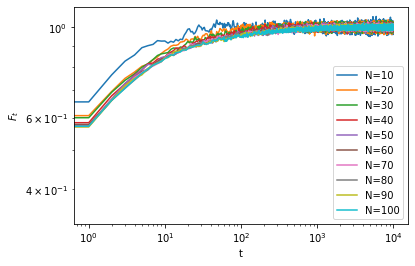

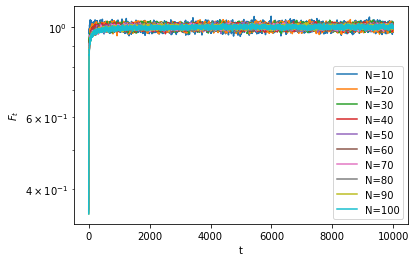

In [11]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(n*purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(n*purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

## Pure initial state, increasingly delocalized

$$ \rho_j = \frac{1}{N} \left(\sum_i^j \vert i \rangle \right) \left( \sum_i^j \langle i \vert \right) $$

In [9]:
ne = 1000
n_layers = 10000
all_purities = []
n = 100

js = numpy.array([1] + list(10*numpy.arange(1,11)))
for j in js:
    state = numpy.array([1]*j + [0]*(n-j), dtype=numpy.complex128) / numpy.sqrt(j)
    part_on_bound = py_entropy.SingleDefectState(state, num_experiments=ne)
    purities = part_on_bound.apply_alternative_layers_and_save_mean_purity(n_layers)
    all_purities.append(purities)
pure_purities = numpy.array(all_purities)

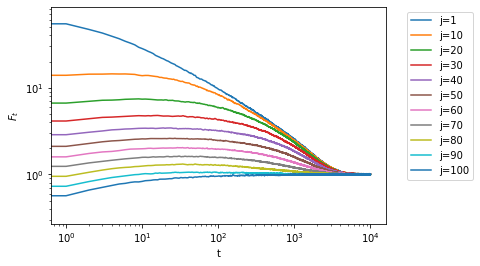

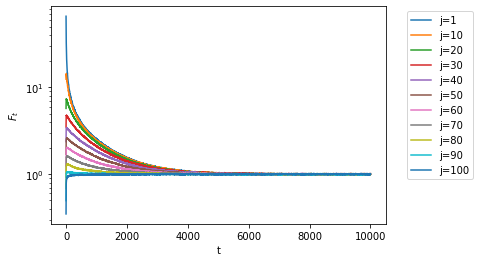

In [10]:
for j, purity in zip(js, pure_purities):
    pyplot.plot(n*purity, label=f"j={j}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend(bbox_to_anchor=(1.05,1.0))
pyplot.show()

for j, purity in zip(js, pure_purities):
    pyplot.plot(n*purity, label=f"j={j}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend(bbox_to_anchor=(1.05,1.0))
pyplot.show()

## Totally mixed initial state with uniformly delocalized particle

$$ \rho = \frac{1}{N} \sum_i \vert i \rangle \langle i \vert $$

In [12]:
ne = 100
n_layers = 1000
all_purities = []

ns = 10*numpy.arange(1,11)
for n in ns:
    all_states = []
    for i in range(n):
        x = [0]*n
        x[i] = 1
        all_states.append(numpy.asarray(x, dtype=numpy.complex128))
    
    part_on_bound = py_entropy.SingleDefectState.new_mixed([(1.0/n, s) for s in all_states], num_experiments=ne)
    purities = part_on_bound.apply_alternative_layers_and_save_mean_purity(n_layers)
    all_purities.append(purities)
mixed_purities = numpy.array(all_purities)

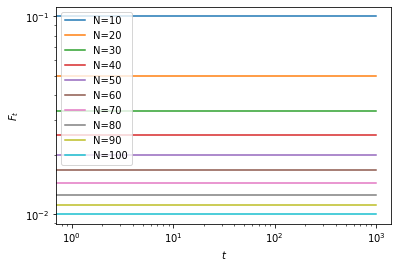

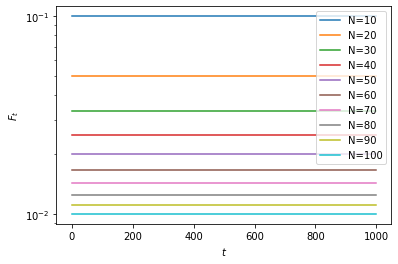

In [14]:
for n, purity in zip(ns, mixed_purities):
    pyplot.plot(n*purity, label=f"N={n}")
    
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.xlabel('$t$')
pyplot.ylabel('$F_t$')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, mixed_purities):
    pyplot.plot(n*purity, label=f"N={n}")
    
pyplot.yscale('log')
pyplot.xlabel('$t$')
pyplot.ylabel('$F_t$')
pyplot.legend()
pyplot.show()